# Proiektua: Community Detection

#### Julen Etxaniz eta Aitor Zubillaga

Adimen Artifiziala modan dago, eta ikerlari asko ari dira egun, gai honetan ikerketzen. Hori dela eta, azken urteetan Machine Learning, Deep Learning, Big Data eta optimizazio metaheuristikoan ikaragarrizko produkzio zientifikoa eman da. Sortzen diren aurrerakuntza guztiak publikatu eta elkarbanatzeko asmotan, ehundaka konferentzia daude munduko herrialde desberdinetan. Hauetan, herrialde desberdinetako ikerlariak euren ikerketak azaltzeaz gain, kolaborazio desberdinak ematen dira.

Proiektu honetan, Neural Information Processing Systems (NIPS) kongresuan publikatzen duten autoreen komunitateak aztertu nahiko ditugu. Zehazki, 2014 eta 2015 urteen bitartean, kongresu honetan eman diren elkarlan komunitate desberdinak aurkitu nahi izango ditugu. 

Era asko daude komunitateak detektatzeko, baina proiektuaren helburua metaheuristikoak erabiltzea da. Horregatik NIPSeko elkarlan grafoa eraikiko dugu, eta komunitate kopuru maximo bat ezarrita, algoritmoak komunitate bakoitzean dauden autoreak (nodoak) zeintzuk diren esan beharko digu.

Proiektu honetan ondorengo ataza orokorrak gauzatu beharko ditugu.

* Kargatu NIPS datu baseko elkarlanak eta sortu elkarlan grafoa.
* Problema aztertu. Zenbat soluzio daude $n$ nodo eta $k$ komunitate dituen problema batean? Denak bideragarriak dira? Ez badira, zein dira bete behar diren murrizketak?
* Soluzioen kodeketa eta helburu-funtzioa. Nola adierazi daiteke problema honetarako soluzio bat? Zein da problemaren helburu-funtzioa?
* Algoritmoak. Proposatu gutxienez bi algoritmo problema ebazteko (bat bilaketa lokal erakoa eta bestea algoritmo poblazionalen taldekoa), eta egin dagozkien inplementazioak **liburutegirik erabili gabe**.
* Esperimentazioa. Probatu eta konparatu algoritmoak esku artean dugun problemaren gainean.
* Txostena. 4 orritako artikulu zientifiko bat idatzi beharko duzue garatu duzuen lana laburbilduz. Adi! 4 orri ez dira gehiegi. Overleaf-en editatu beharko duzue eta *IEEE Journal Paper Template* txantiloia erabiliz. Artikulu zientifiko egitura izan beharko du (laburpena, sarrera, problemaren azalpena, proposatutako algoritmoak, esperimentazioa, emaitzen analisia, eta ondorioak).

Dakizuen bezela, proiektua 3 fasetan banatuko dugu, baina, hasi aurretik, behar izango ditugun Python-eko moduluak importatzeko gai garela frogatuko dugu. Notebook honen helburua <i>puesta a punto</i> bat egitea izango da: moduluak instalatu, eta NIPS-eko datuak kargatzeko gai izatea. Azkenik, NIPS-eko datuetatik abiatuta, eta NetworkX eta Community moduluak erabilita, elkarlan grafoa bistaratu nahiko dugu.

Importatu ondorengo liburutegiak:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection

/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection


In [3]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

### NIPSeko grafoa eraikitzen

Azken hamarkadetan NIPS kongresuan publikatutako datuak <b>database.sqlite</b> fitxategian aurkitzen dira. Ondorengo kodearen bitartez, hiru zutabeko taula batean datuak ateratzeko gai izan beharko ginateke. Zutabeetan, artikuluaren IDa, autorearen IDa eta autorearen izena agertu beharko dira.

In [4]:
# Get data
connect = sqlite3.connect('data/database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2014' AND '2015'
"""
df = pd.read_sql(query, connect)

# Have a look at data
df.head(10)

,paper_id,author_id,name
0,5239,5654,Krikamol Muandet
1,5239,7140,Bharath Sriperumbudur
2,5239,1472,Bernhard Sch?lkopf
3,5591,5209,Yichuan Zhang
4,5591,7542,Charles Sutton
5,5597,7649,Mu Li
6,5597,7650,David G. Andersen
7,5597,6548,Alexander J. Smola
8,5597,2847,Kai Yu
9,5299,7226,Halid Z. Yerebakan


Dagoeneko datuak baditugu! Orain elkarlan grafoa eraikiko dugu, horretarako NetworkX modulua erabiliko dugu. Grafo horretan, autore bakoitzeko nodo bat izango dugu, eta bi autoreren artean elkarlana egon bada (artikulu bat batera idatzi badute), orduan dagozkien nodoen artean arku bat egongo da. Baina ez da berdina elkarlan bat egitea, edo 100. Horregatik, arkuek pisu bat izango dute, elkarlan kopurua adieraziko duena. Grafoa ondo sortu duzuela jakiteko, 2014 eta 2015 urteen bitarteko datuekin, 1843 nodo, 3215 arkuko grafoa lortu beharko duzue.

In [5]:
# Initialize graph
G = nx.Graph()

# Transform
# Autorearen IDa erabili beharrean erabili izena.
for p, a in df.groupby('paper_id')['name']: 
    for u, v in itertools.combinations(a, 2):
        if G.has_edge(u, v):
            G[u][v]['weight'] +=1
        else:
            G.add_edge(u, v, weight=1)
            
# Print graph size
print('Autore kopurua grafoan:', G.number_of_nodes())
print('Elkarlan kopurua grafoan:', G.number_of_edges())

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


Azkenik, eraiki dugun grafoa bistaratuko dugu. Horretarako, MatPlotLib modulua erabiliko dugu.

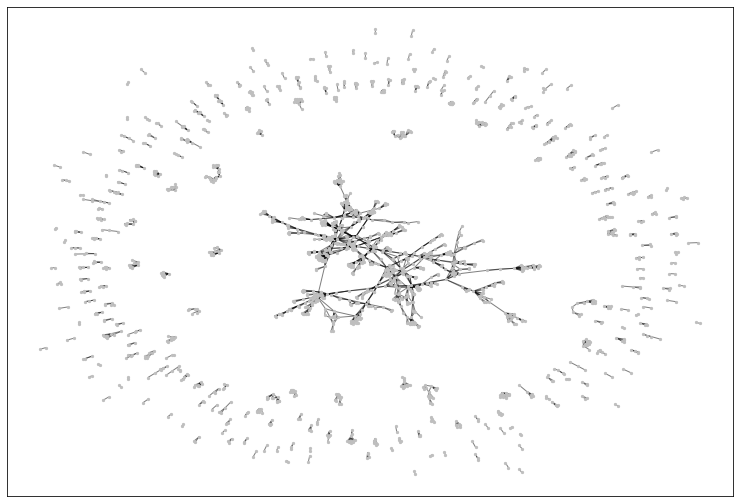

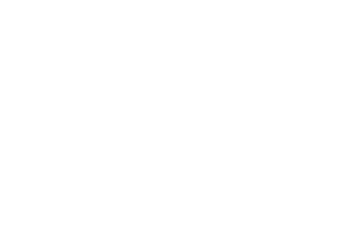

In [11]:
#Draw graph
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='0.75', label=True)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
plt.show()

plt.axis('off')
plt.show()

Jarraian, sortu goiko kodea erabiliz ondorengo input/output-a duten funtzioak:

In [ ]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def sortu_grafoa():
    # Datuak irakurri
    # BETE HEMEN 8 lerro
    # Get data
    connect = sqlite3.connect('data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Have a look at data
    df.head(10)
    
    # Sortu grafoa
    # BETE HEMEN 7-10 lerro
    # Initialize graph
    G = nx.Graph()

    # Transform
    # Autorearen IDa erabili beharrean erabili izena.
    for p, a in df.groupby('paper_id')['name']: 
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)
                
    # Print graph size
    print('Autore kopurua grafoan:', G.number_of_nodes())
    print('Elkarlan kopurua grafoan:', G.number_of_edges())
    
    return G

def bistaratu_grafoa(G):
    # BETE HEMEN 6 lerro
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75', label=True)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

    plt.axis('off')
    plt.show()

In [ ]:
G = sortu_grafoa()

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


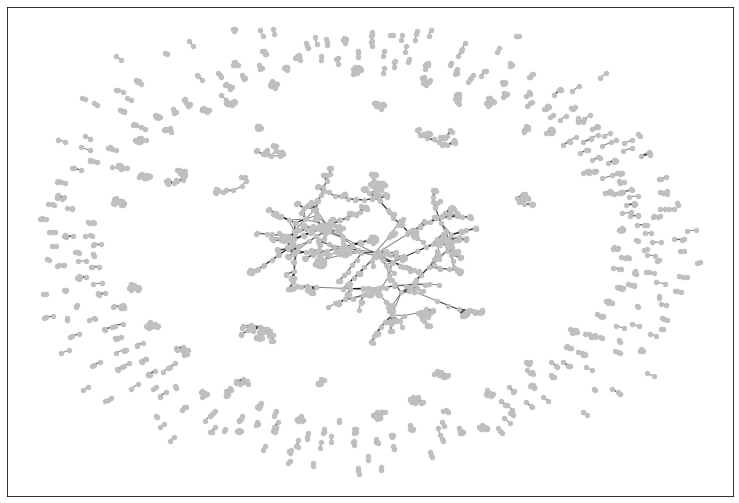

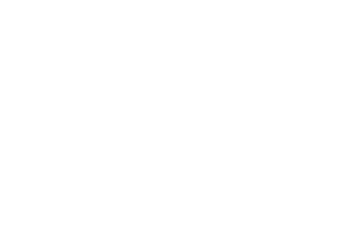

In [ ]:
bistaratu_grafoa(G)